In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)
import numpy as np
from datetime import datetime
from textblob import TextBlob

In [2]:
df = pd.read_csv('enron_email/emails.csv')



In [3]:
def mark_words(row):
    if 'project' in row['message']:
        return 'has project word'
    return 'no project word'

df['project_status'] = df.apply(mark_words, axis = 1)

In [5]:
project_df = df[df['project_status'] == 'has project word']

In [9]:
project_df['message'].tolist()[5]

"Message-ID: <31434120.1075855688116.JavaMail.evans@thyme>\nDate: Wed, 20 Sep 2000 06:34:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: cbpres@austin.rr.com\nSubject: \nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: cbpres@austin.rr.com\nX-cc: \nX-bcc: \nX-Folder: \\Phillip_Allen_Dec2000\\Notes Folders\\'sent mail\nX-Origin: Allen-P\nX-FileName: pallen.nsf\n\nGeorge,\n\n Below is a list of questions that Keith and I had regarding the Westgate \nproject:\n\n Ownership Structure\n\n What will be the ownership structure? Limited partnership? General partner?\n\n What are all the legal entities that will be involved and in what \ncapacity(regarding ownership and \n liabilities)?\n\n Who owns the land? improvements?\n\n Who holds the various loans?\n\n Is the land collateral?\n\n Investment\n \n What happens to initial investment?\n\n Is it used to purchase land for cash?Secure future loans?\n \n Why is the 

In [3]:
df['message'][4]

"Message-ID: <30922949.1075863688243.JavaMail.evans@thyme>\nDate: Thu, 31 Aug 2000 05:07:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: greg.piper@enron.com\nSubject: Re: Hello\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Greg Piper\nX-cc: \nX-bcc: \nX-Folder: \\Phillip_Allen_Dec2000\\Notes Folders\\'sent mail\nX-Origin: Allen-P\nX-FileName: pallen.nsf\n\nLet's shoot for Tuesday at 11:45.  "

In [10]:
def parse_raw_message(raw_message):
    lines = raw_message.split('\n')
    email = {}
    message = ''
    keys_to_extract = ['from', 'to', 'subject', 'date', 'x-from', 'x-to']
    for line in lines:
        if ':' not in line:
            message += line.strip()
            email['body'] = message
        else:
            pairs = line.split(':')
            key = pairs[0].lower()
            val = pairs[1].strip()
            val = val.replace('.', '. ')
            if key in keys_to_extract:
                email[key] = val
    return email
def parse_into_emails(messages):
    emails = [parse_raw_message(message) for message in messages]
    print(emails[0])
    bodies = []
    tos = []
    froms = []
    subjects = []
    dates = []
    xfroms = []
    xtos = []
    for email in emails:
        froms.append(email['from'])
        tos.append(email.get('to', None))
        bodies.append(email['body'])
        subjects.append(email.get('subject', None))
        dates.append(email.get('date', None))
        xfroms.append(email.get('x-from', None))
        xtos.append(email.get('x-to', None))
    return {
        'body': bodies, 
        'to': tos, 
        'from_': froms,
        'subject': subjects,
        'date': dates,
        'xfroms': xfroms,
        'xtos': xtos
    }

In [11]:
project_email_df = pd.DataFrame(parse_into_emails(project_df.message))


{'date': 'Mon, 9 Oct 2000 07', 'from': 'phillip. allen@enron. com', 'to': 'Richard Burchfield/HOU/ECT@ECT', 'subject': 'Consolidated positions', 'x-from': 'Phillip K Allen', 'x-to': 'Keith Holst', 'body': "---------------------- Forwarded by Phillip K Allen/HOU/ECT on 10/09/2000Richard BurchfieldPhillip,Below is the issues & to do list as we go forward with documenting therequirements for consolidated physical/financial positions and transporttrade capture. What we need to focus on is the first bullet in Allan's list;the need for a single set of requirements. Although the meeting with Keith,on Wednesday,  was informative the solution of creating a infinitely dynamicconsolidated position screen, will be extremely difficult and timeconsuming.  Throughout the meeting on Wednesday, Keith alluded to theinability to get consensus amongst the traders on the presentation of theconsolidated position, so the solution was to make it so that a trader canarrange the position screen to their liking 

In [12]:
project_email_df

,body,to,from_,subject,date,xfroms,xtos
0,---------------------- Forwarded by Phillip K ...,Richard Burchfield/HOU/ECT@ECT,phillip. allen@enron. com,Consolidated positions,"Mon, 9 Oct 2000 07",Phillip K Allen,Keith Holst
1,---------------------- Forwarded by Phillip K ...,Richard Burchfield/HOU/ECT@ECT,phillip. allen@enron. com,Consolidated positions,"Mon, 9 Oct 2000 07",Phillip K Allen,Keith Holst
2,---------------------- Forwarded by Phillip K ...,"""Phillip Allen"" <pallen@enron. com>",phillip. allen@enron. com,Westgate,"Tue, 3 Oct 2000 09",Phillip K Allen,pallen70@hotmail. com
3,---------------------- Forwarded by Phillip K ...,"""Phillip Allen"" <pallen@enron. com>",phillip. allen@enron. com,Investment Structure,"Tue, 26 Sep 2000 09",Phillip K Allen,kholst@enron. com
4,---------------------- Forwarded by Phillip K ...,"""Phillip Allen"" <pallen@enron. com>",phillip. allen@enron. com,Investment Structure,"Tue, 26 Sep 2000 09",Phillip K Allen,pallen70@hotmail. com
...,...,...,...,...,...,...,...
27182,I am sure that John Lavorato will want to see ...,cooper. richey@enron. com,john. zufferli@enron. com,presentation for lavo,"Mon, 6 Aug 2001 11","Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Richey, Cooper </O=ENRON/OU=NA/CN=RECIPIENTS/C..."
27183,-----Original Message-----The implementation o...,denis. martin@airliquide. com; pbartsch@utilic...,Barry Rushford <barry. rushford@powerpool. ab....,Automated Dispatch Messaging from the Power Po...,"Fri, 29 Jun 2001 08","Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Taylor, Michael J. </O=ENRON/OU=NA/CN=RECIPIE..."
27184,an\td 2003 -200X Meeting-----Original Message-...,=09A. A. da Silva (E-mail); A. L. McLarty ...,"=09""Nering, Debbie"" <debbie. nering@eal. ab. c...",=09ESBI Alberta Ltd. - Stakeholder Developmen...,"Mon, 25 Jun 2001 07","Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Messenger, John P. </O=ENRON/OU=NA/CN=RECIPIE..."
27185,I hope stock goes to $35 so I can buy it at re...,John Zufferli (E-mail),"""Meyerhoeffer, Dale"" <DMeyerhoeffer@mlp. com>@...",Bleeding,"Wed, 20 Jun 2001 14","Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","'""Meyerhoeffer, Dale"" <DMeyerhoeffer@mlp. com>..."


In [18]:
largest_emails = project_email_df.groupby('from_').size().nlargest(5)

<AxesSubplot:xlabel='from_'>

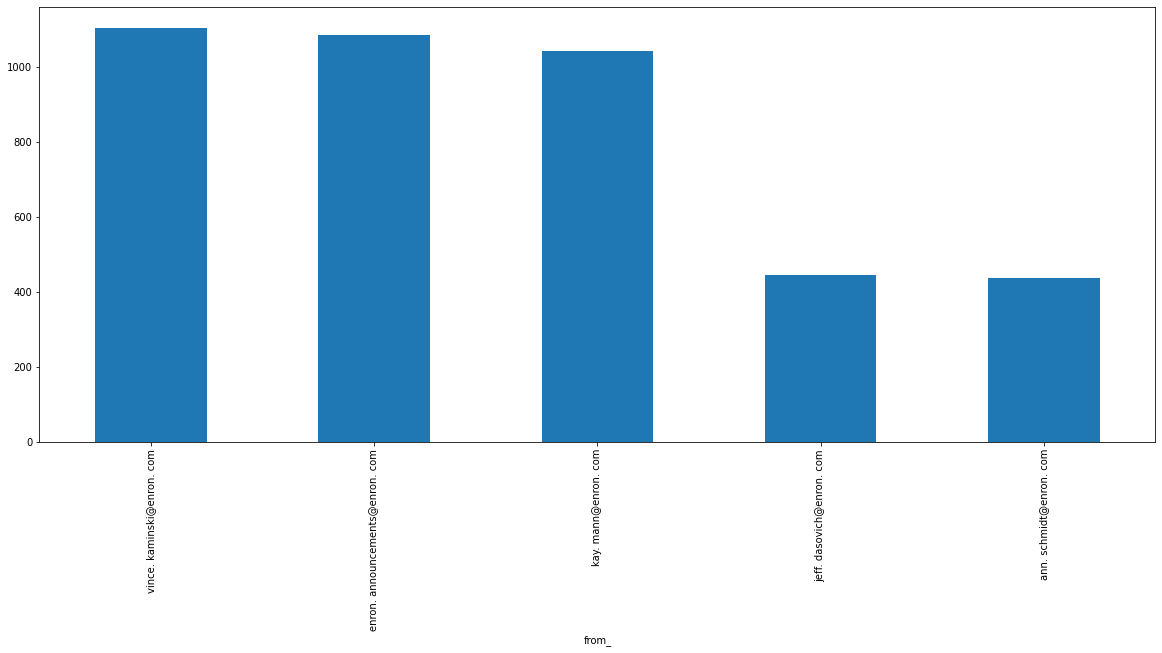

In [19]:
largest_emails.plot.bar()

In [20]:
tos = project_email_df['to'].tolist()

to_freq = {}
for to in tos:
    to_freq[to] = to_freq.get(to, 0) + 1


In [21]:
for key, val in largest_emails.to_dict().items():
    print(to_freq.get(key, 0))

95
0
120
142
30


In [11]:
# from datetime import datetime

datetime_object = datetime.strptime('Thu, 31 Aug 2000 05', '%a, %d %b %Y %H')
print(datetime_object)

2000-08-31 05:00:00


In [22]:
def parse_date(row):
    date_str = row['date']
    try:
        datetime_object = datetime.strptime(date_str, '%a, %d %b %Y %H')
    except:
        return None
    return datetime_object

In [25]:
project_email_df['date_converted'] = project_email_df.apply(parse_date, axis = 1)




In [27]:
project_email_df.dropna(inplace =True)

In [28]:
project_email_df['date_converted']

0       2000-10-09 07:00:00
1       2000-10-09 07:00:00
2       2000-10-03 09:00:00
3       2000-09-26 09:00:00
4       2000-09-26 09:00:00
                ...        
27182   2001-08-06 11:00:00
27183   2001-06-29 08:00:00
27184   2001-06-25 07:00:00
27185   2001-06-20 14:00:00
27186   2001-12-11 09:00:00
Name: date_converted, Length: 24976, dtype: datetime64[ns]

In [16]:
# email_df.groupby(email_df.date_converted.dt.day).size().plot()


<AxesSubplot:xlabel='date_converted'>

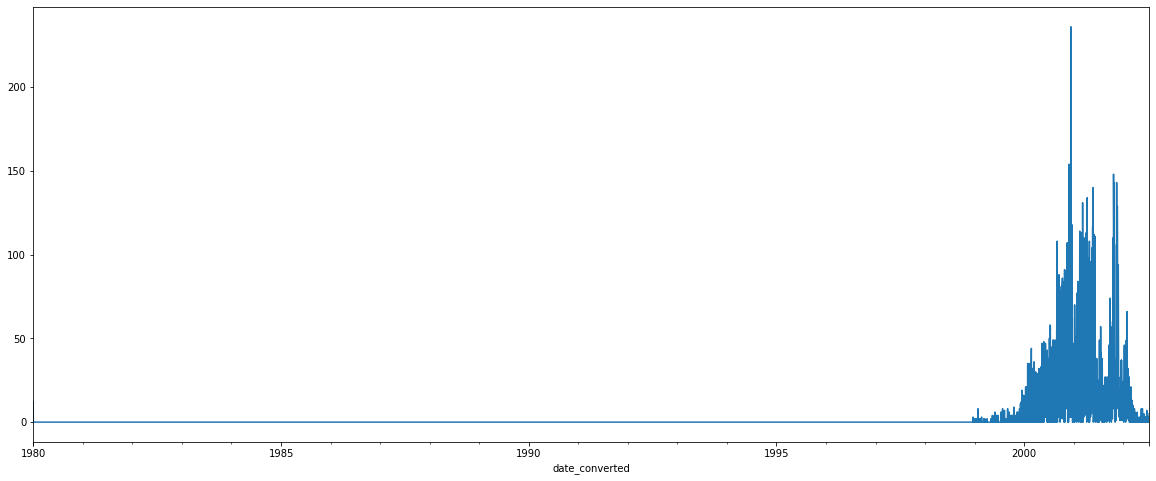

In [30]:
# email_df = email_df[100:]
plt.rcParams["figure.figsize"] = (20,8)
project_email_df = project_email_df.set_index('date_converted') 
project_email_df.sort_index(inplace = True)
project_email_df.groupby(pd.Grouper(freq='D')).size().plot()

In [33]:
project_email_df['parsed_date'] = project_email_df.index
mask = project_email_df['parsed_date'] > '2000-01-01'
project_email_df = project_email_df.loc[mask]

<AxesSubplot:xlabel='date_converted'>

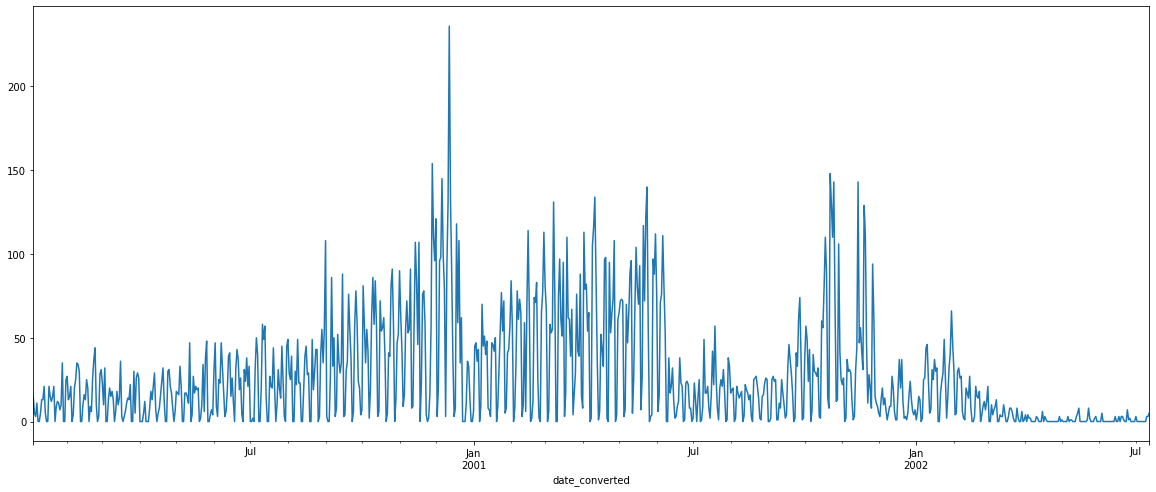

In [34]:
plt.rcParams["figure.figsize"] = (20,8)
project_email_df.groupby(pd.Grouper(freq='D')).size().plot()

## Finding Projects Containing word Project

In [44]:
def mark_words(row):
    if 'project' in row['body']:
        return 'has project word'
    return 'no project word'

project_email_df['project_status_in_body'] = project_email_df.apply(mark_words, axis = 1)

In [48]:
project_body_df = project_email_df[project_email_df['project_status_in_body'] == 'has project word']

In [49]:
project_body_df

,body,to,from_,subject,date,xfroms,xtos,parsed_date,project_status_in_body
date_converted,,,,,,,,,
2000-01-04 02:00:00,Louise - If you are back in Houston I'd like t...,louise. kitchen@enron. com,mark. taylor@enron. com,EnronOnline Credit Derivatives,"Tue, 4 Jan 2000 02",Mark Taylor,Louise Kitchen,2000-01-04 02:00:00,has project word
2000-01-04 02:00:00,Louise - If you are back in Houston I'd like t...,louise. kitchen@enron. com,mark. taylor@enron. com,EnronOnline Credit Derivatives,"Tue, 4 Jan 2000 02",Mark Taylor,Louise Kitchen,2000-01-04 02:00:00,has project word
2000-01-04 04:00:00,"Candace,Sorry for the delay. I shall edit the ...","Margaret Daffin/HOU/ECT@ECT, Candace Womack/HO...",vince. kaminski@enron. com,RE,"Tue, 4 Jan 2000 04",Vince J Kaminski,Candace Womack,2000-01-04 04:00:00,has project word
2000-01-04 07:00:00,I am resending the original message that I sen...,Kevin P Hannon/HOU/ECT@ECT,sally. beck@enron. com,Various Discussion Points,"Tue, 4 Jan 2000 07",Sally Beck,Carol Ann Brown,2000-01-04 07:00:00,has project word
2000-01-04 07:00:00,I am resending the original message that I sen...,Kevin P Hannon/HOU/ECT@ECT,sally. beck@enron. com,Various Discussion Points,"Tue, 4 Jan 2000 07",Sally Beck,Carol Ann Brown,2000-01-04 07:00:00,has project word
...,...,...,...,...,...,...,...,...,...
2002-07-12 03:00:00,Lets get together to discuss..----------------...,<kurt. anderson@enron. com>,kurt. anderson@enron. com,FW,"Fri, 12 Jul 2002 03",Kurt Anderson,"Jeff Duff, Mark V Walker, Mark Fisher",2002-07-12 03:00:00,has project word
2002-07-12 03:00:00,Lets get together to discuss..----------------...,<kurt. anderson@enron. com>,kurt. anderson@enron. com,FW,"Fri, 12 Jul 2002 03",Kurt Anderson,"Jeff Duff, Mark V Walker, Mark Fisher",2002-07-12 03:00:00,has project word
2002-07-12 03:00:00,Lets get together to discuss..----------------...,<kurt. anderson@enron. com>,kurt. anderson@enron. com,FW,"Fri, 12 Jul 2002 03",Kurt Anderson,"Jeff Duff, Mark V Walker, Mark Fisher",2002-07-12 03:00:00,has project word


In [48]:
sentiments = []
bodies = []
dates = []
for index, row in email_df.iterrows():
    body = row['body']
    bodies.append(body)
    opinion = TextBlob(body)
    pol, sent = opinion.sentiment
    if sent < 0.7:
        continue
    sentiments.append(sent)
    dates.append(row['parsed_date'])

Text(0, 0.5, 'Sentiment')

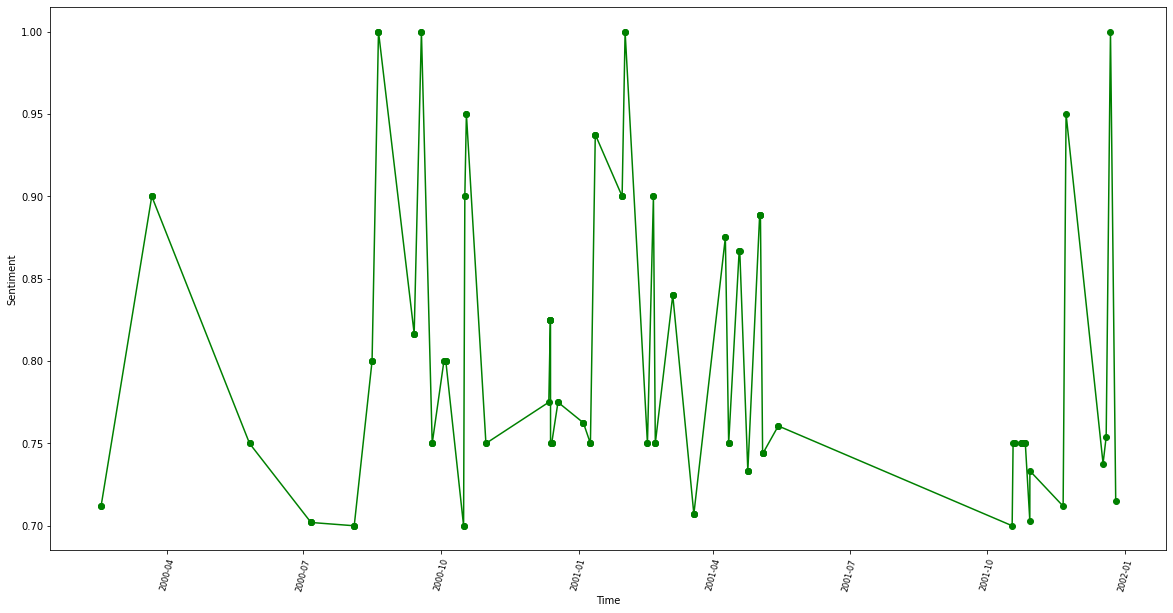

In [49]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.xticks(rotation=75, fontsize=8)
ax.plot(dates, sentiments, marker='o', color = 'green' )

plt.xlabel('Time')
plt.ylabel('Sentiment')

In [47]:
for sentiment, body, date in zip(sentiments, bodies, dates):
    if sentiment > 0.95:
        print(body)
        print()
#         break
        

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 08/20/2000Phillip,The a/c I bought today for #17 cost $166.71 pd by ck#14298/16/00 at WAL-MART.Also on 8/15/00 Ralph's Appliance Centerck#1428frig & stove for apt #20-B IVOICE # 000119 AMT=308.56 (STOVE=150.00(frig=125.00)DEL CHRG=15.00\TAX=18.56 TOTAL=308.56.FAX MACHINE FORFFICE CK # 1427=108.25 FROM sTEELMAN OFFICE PRODUCTS.                                           Thanxs, Lucy________________________________________________________________________

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 08/20/2000Phillip,The a/c I bought today for #17 cost $166.71 pd by ck#14298/16/00 at WAL-MART.Also on 8/15/00 Ralph's Appliance Centerck#1428frig & stove for apt #20-B IVOICE # 000119 AMT=308.56 (STOVE=150.00(frig=125.00)DEL CHRG=15.00\TAX=18.56 TOTAL=308.56.FAX MACHINE FORFFICE CK # 1427=108.25 FROM sTEELMAN OFFICE PRODUCTS.                                           Thanxs, Lucy__________________________________